---

# Introduction

In this homework you will:

* Recall your skills of data analysis and preprocessing.
* Explore the behaviour of different machine learning models.
* Try to solve a regression type problem and interpret the results.

But first of all, a few notes:

* Check the first homework for a quick reminder on general rules.
* We do not expect you to make a model that makes necessarly good predictions, rather than explain why do you get the results which you get.
* We reserve the right to lower the grade for messy code, so keep it clean and make comments about what you do!
* Remember to submit the feedback! Especially if the homework was too difficult or easy for you.

This time, you will do the coding part yourself. That means, you take decisions about EDA, data cleaning, hyperparameters choice, etc. on your own (for the most part, at least).

Enjoy it while I rest!  \ (•◡•) /

Another important mention: your work must be reproducible.
It means that it would be possible to run your code and obtain the same results by pressing "Run All" button in settings of this notebook. To do so, don't forget to fix the random seed number where possible!

# Dataset

Today your task will be to understand the relationship between the cholesterol level and its associated factors, such as gender, age, BMI, medical condition and some genomic features. This can be explored by a regression analysis using machine learning methods that we learned in the class.

Description of the variables:

* DM: diabetes mellitus: 0 = no diabetes, 1 = diabetes
* age: Age in years
* chol: Serum total cholesterol, mg/dl
* BMI: Body-mass index, kg/m2
* TG: Serum triglycerides, mg/dl
* APOE: Apolipoprotein E genotype, with six genotypes coded 1-6: 1 = e2/e2, 2 = e2/e3, 3 = e2/e4, 4 = e3/e3, 5 = e3/e4, 6 = e4/e4
* rs174548: Candidate SNP 1 genotype, chromosome 11, physical position 61,803,876
. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.
* rs4775041: Candidate SNP 2 genotype, chromosome 15, physical position 58,382,496. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.
* HTN: diagnosed hypertension: 0 = no, 1 = yes
* chd: diagnosis of coronary heart disease: 0 = no, 1 = yes

Target variable: Serum total cholesterol

# Tasks [8.0]

### Exploratory Data Analysis [2.5]

[0.1] Before the analysis itself, don't forget to check the features you are working with. Some of them are not very obvious. Google some information on what those features represent, and write it down here:

* **TG (Triglyceride, сывороточные триглицериды)** - это разновидность липидов, содержащаяся в  крови. Существует анализ TG level - это анализ крови для измерения триглицеридов. Разница триглицеридов и холестерина в том, что первые накапливают неиспользованные калории и обеспечивают организм энергией, а холестерин используется для построения клеток и некоторых гормонов. Молекула триглицерида (TG) состоит из глицериновой основы, этерифицированной тремя жирными кислотами. Триглицериды являются основным компонентом растительных и животных жиров в рационе питания и являются основным компонентом жировых запасов организма.  

  Высокий уровень триглицеридов в крови может увеличить риск сердечных заболеваний. Здоровый уровень: Ниже 150 миллиграммов на децилитр (мг/дл) для взрослых; ниже 90 мг/дл для детей и подростков (10-19 лет). Погранично высокий уровень: от 150 до 199 мг/дл. Высокий уровень: от 200 до 499 мг/дл.
* **APOE** - Apolipoprotein (apo) E, многофункциональный белок, играющий центральную роль в липидном обмене, нейробиологии и нейродегенеративных заболеваниях. Он имеет три основные изоформы (apoE2 - в данном случае e2, apoE3 - e3 и ApoE4 - e4), оказывающие различное влияние на липидный и нейрональный гомеостаз и образующие шесть генотипов, перечисленные в описании к заданию выше. Основной функцией apoE является опосредование связывания липопротеинов (mediate the binding of lipoproteins) или липидных комплексов в плазме или интерстициальных жидкостях (interstitial fluids) со специфическими рецепторами на поверхности клеток.

* **rs174548** - этот снип имеет слишком много опубликованных ассоциированных признаков (reported traits в GWAS), но, если смотреть на те, в исследовании которых принимало наибольшее количество людей, то это: количество миелоидных лейкоцитов, измерение уровня гемоглобина, уровня креатинина, старения кожи, уровня гемоглобина A1 количество эозинофилов и т.д.

  И, конечно же, **имеются ассоциации данного снипа с холестерином**, такие как: измерение общего уровня холестерина, измерение уровня холестерина липопротеидов высокой плотности, исследования которых проводились в 2019 и 2010 годах, и т.д. Кроме того, существуют информация о связи с измерением уровня триглицеридов и содержания фосфатидилэтаноламина. Триглицериды являются липидами, как и холестирин, и важным показателем, применяемым наряду с уровнем холестерина для оценки риска развития атеросклероза. Вместе с холестерином триглицериды обеспечивают клетки энергией и участвуют в синтезе биологически активных веществ.  
  
  5 prime utr variant, location chr11:61803876, mapped genes - FADS1, FADS2(forward strand)

  FADS1 (у FADS2 такое же описание) - Белок, кодируемый этим геном, относится к семейству генов десатуразы жирных кислот (FADS). Ферменты десатуразы регулируют ненасыщенность жирных кислот путем введения двойных связей между определенными атомами углерода ацильной цепи жирных кислот.

* **rs4775041** - данный снип ассоциирован с измерением уровня холестерина липопротеидов высокой плотности, содержания метаболитов в сыворотке
крови, содержания фосфатидилэтаноламина, уровня липидов, фосфолипидов и содержания диглицеридов.

  G/C(forward strand), Intron variant, location chr1515:58382496, mapped gene - ALDH1A2('-' strand)
  
  ALDH1A2 - Катализирует NAD-зависимое окисление альдегидных субстратов, таких как полностью транс-ретиналь и полностью транс-13,14-дигидроретиналь, до соответствующих им карбоновых кислот, полностью транс-ретиноата и полностью транс-13,14-дигидроретиноата, соответственно (PubMed: 29240402, 33565183). Заболевания, связанные с ALDH1A2, включают диафрагмальную грыжу 4, дефекты сердечно-сосудистой системы и нервной трубки.

You can (and should!) use this information when interpreting results.

Download the data:

In [ ]:
!gdown 1PrtyKo4e_q7jm7lR27CL7VbWVC8vZoWP

Downloading...
From: https://drive.google.com/uc?id=1PrtyKo4e_q7jm7lR27CL7VbWVC8vZoWP
To: /content/Data-Cholesterol-V2.csv
100% 11.4k/11.4k [00:00<00:00, 53.9MB/s]


In [ ]:
!ls

Data-Cholesterol-V2.csv  sample_data


In [ ]:
import pandas as pd

# load the dataset
df = pd.read_csv("Data-Cholesterol-V2.csv")
# print the 'shape' of the matrix
print(f"Rows x columns: {df.shape}")
df.head(n=30)

Rows x columns: (400, 10)


,DM,age,chol,BMI,TG,APOE,rs174548,rs4775041,HTN,chd
0,1,74,215,26.2,367,4,1,2,1,1
1,1,51,204,24.7,150,4,2,1,1,1
2,0,64,205,24.2,213,4,0,1,1,0
3,0,34,182,23.8,111,2,1,1,1,0
4,1,52,175,34.1,328,2,0,0,1,0
5,1,39,176,22.7,53,4,0,2,0,0
6,0,79,159,22.9,274,2,2,1,1,0
7,0,38,169,24.9,137,2,1,1,0,0
8,0,52,175,20.4,125,4,0,1,0,0
9,0,58,189,22.0,209,5,0,1,1,0


* Всего 10 фичей и 400 записей. Наша целевая (таргетная) переменная называется chol (Serum total cholesterol).

[0.5] Know your data, make relevant data analysis and explain:
 * What types of variables there are
 * Your strategy about NaN values, if any present
 * Your strategy about categorical columns, if any present

In [ ]:
# types of variables there are:
df.dtypes

DM             int64
age            int64
chol           int64
BMI          float64
TG             int64
APOE           int64
rs174548       int64
rs4775041      int64
HTN            int64
chd            int64
dtype: object

In [ ]:
# check  NaN values:
print(f"NA values: {df.isna().sum()}\n")

# total number of NaN values:
print(f"Total NA values: {df.isna().sum().sum()}")

NA values: DM            0
age           0
chol          0
BMI          37
TG            0
APOE          0
rs174548      0
rs4775041     0
HTN           0
chd           0
dtype: int64

Total NA values: 37


* Выше представлены типы данных наших переменных. Возраст, общий уровень холестерина и TG-уровень имеют тип данных int, а BMI - float. Таким образом, у нас имеются оставшиеся 6 переменных, которые должны быть категориальными, но на данный момент имеют тип целочисленных данных. Поэтому ниже их тип меняется на category, так как их логично хранить в таком типе данных для дальнейшего анализа и не путать с другими.

  (Я решила поменять их тип после построения графиков, чтобы посмотреть также и их распределения)
* Что касается значений NA, то они присутствуют у BMI, и их 37 штук. Чтобы проводить дальнейший анализ, лучше всего, как мне кажется, удалить эти данные, так 37/400 = 0.0925, то есть, потеряются  около 10% данных. Если заменить на средние значения или медиану, то обучение будет проходить с неким "зашумлением", поэтому ниже я удаляю эти строчки.

In [ ]:
# put mean value instead of NaN values:
df.dropna(axis='index', how='any', inplace=True)

print(f"Total NA values: {df.isna().sum().sum()}")

Total NA values: 0


Assuming your data is now certainly clean, you can start looking at the features.

[0.5] Make relevant visualization of features(histograms, boxplots, etc.) and analyze it.

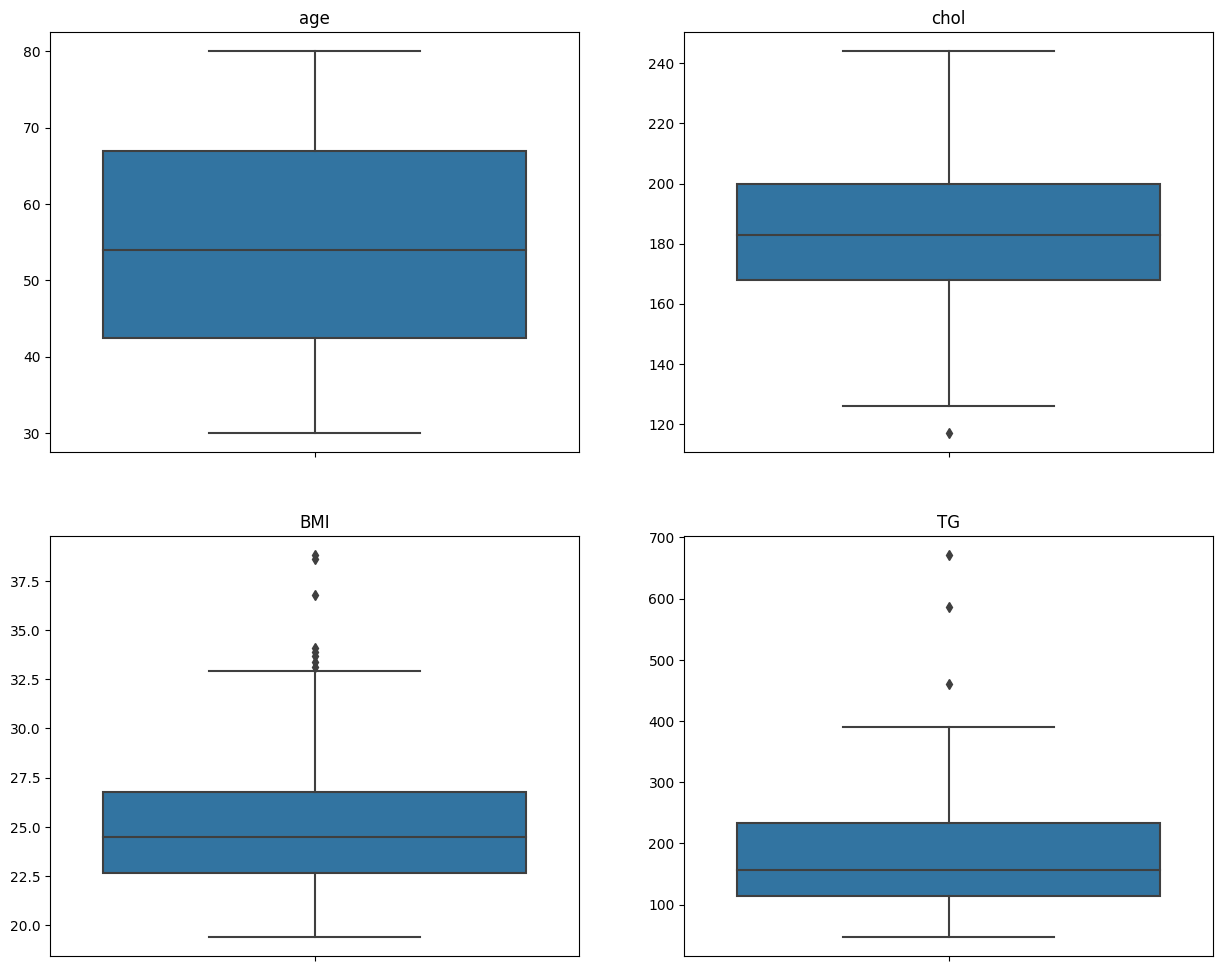

In [ ]:
from numpy.ma import column_stack
# боксплоты

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get numeric columns only
cols = 'age', 'chol', 'BMI', 'TG'

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.ravel()

# Plot boxplot for each numeric column
for col, ax in zip(cols, axes):
  sns.boxplot(y = df[col], ax=ax)
  ax.set_title(col)
  ax.set(xlabel='', ylabel='')

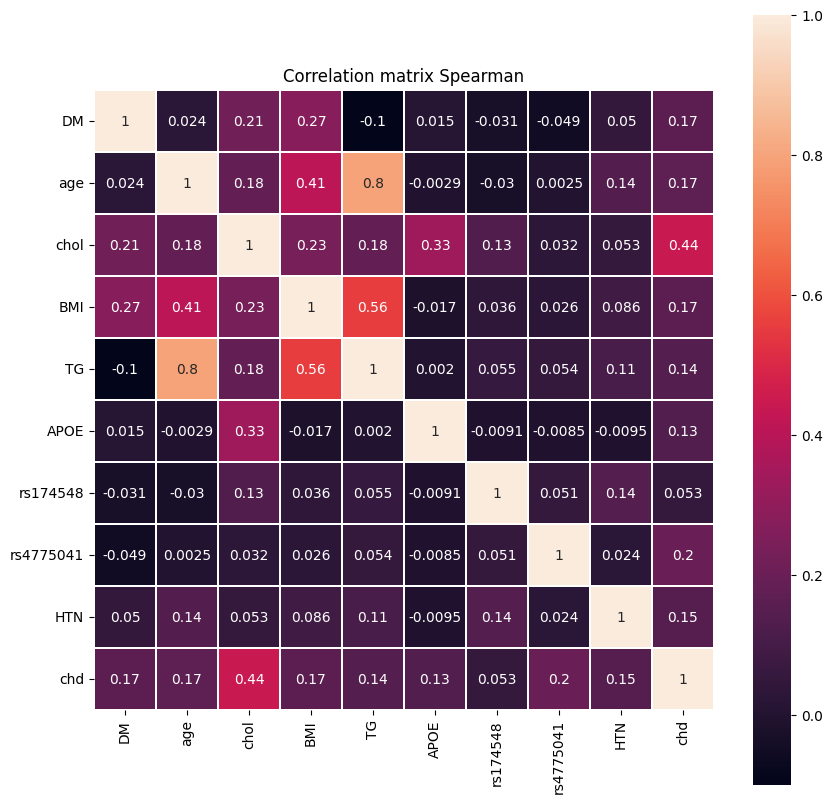

In [ ]:
# heatmap - spearmen по всем переменным
correlations = df.corr(method='spearman')

plt.figure(figsize=(10,10))
sns.heatmap(correlations, square=True, annot=True, linewidths=0.25)
plt.title("Correlation matrix Spearman")
plt.show()

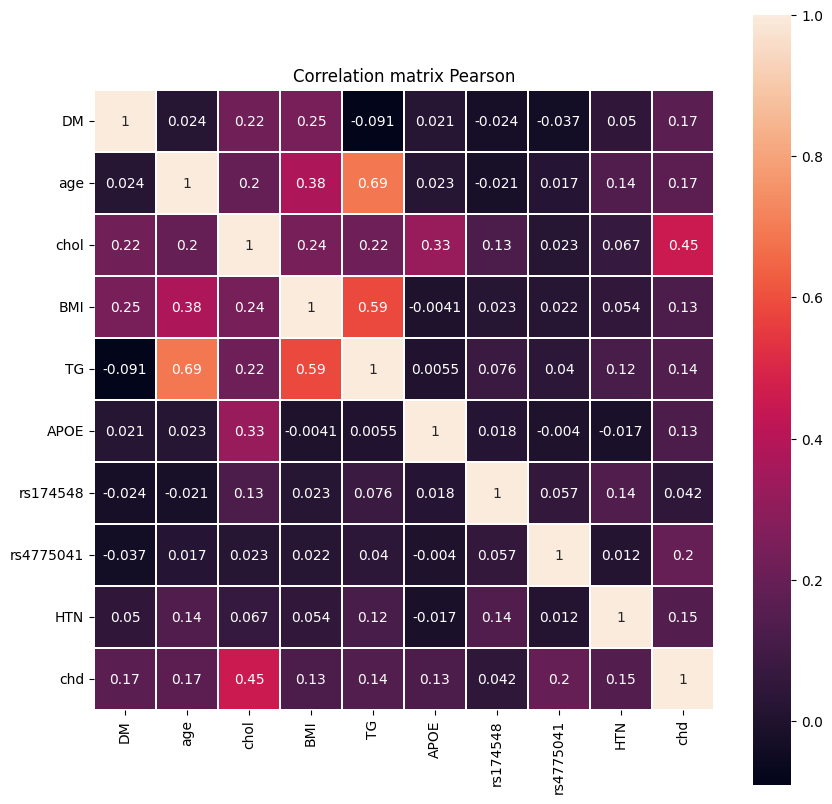

In [ ]:
# heatmap - pearson по всем переменным
correlations = df.corr(method='pearson')

plt.figure(figsize=(10,10))
sns.heatmap(correlations, square=True, annot=True, linewidths=0.25)
plt.title("Correlation matrix Pearson")
plt.show()

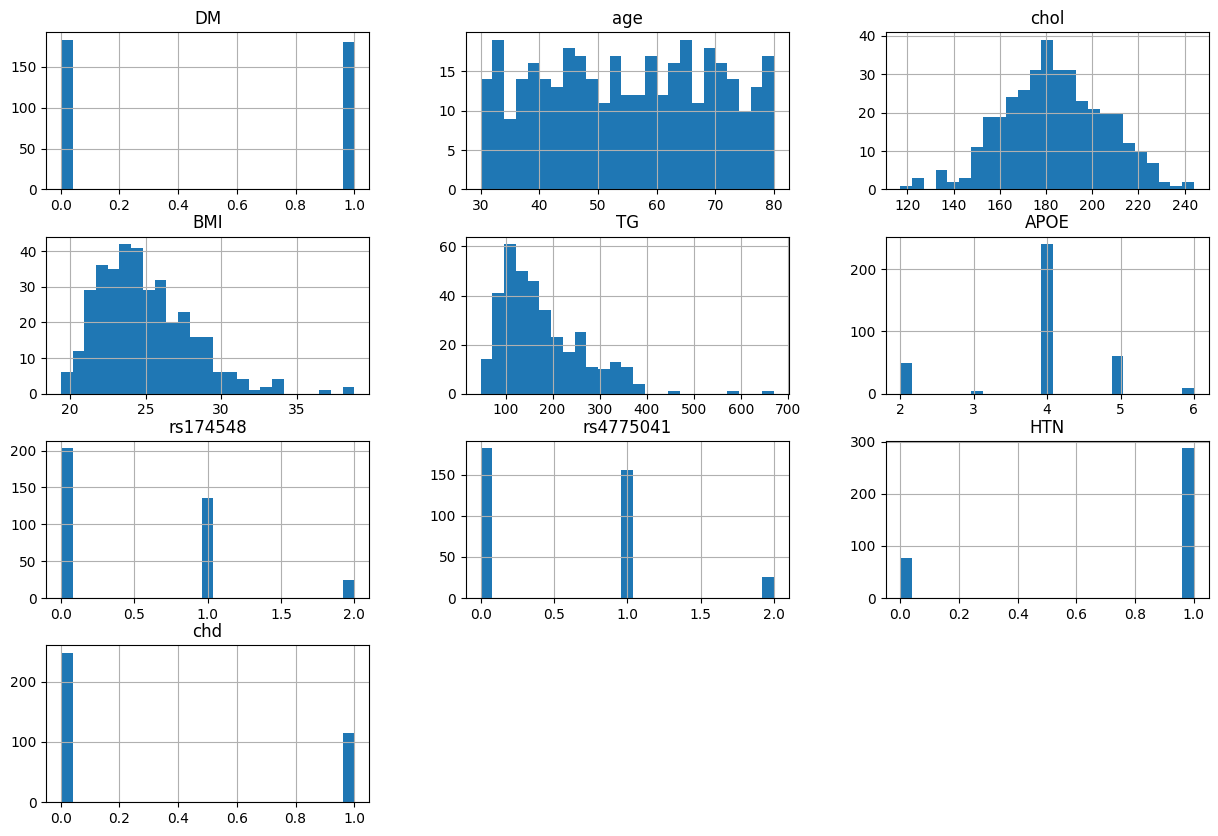

In [ ]:
# гистограммы
_ = df.hist(figsize=(15, 10), bins=25)

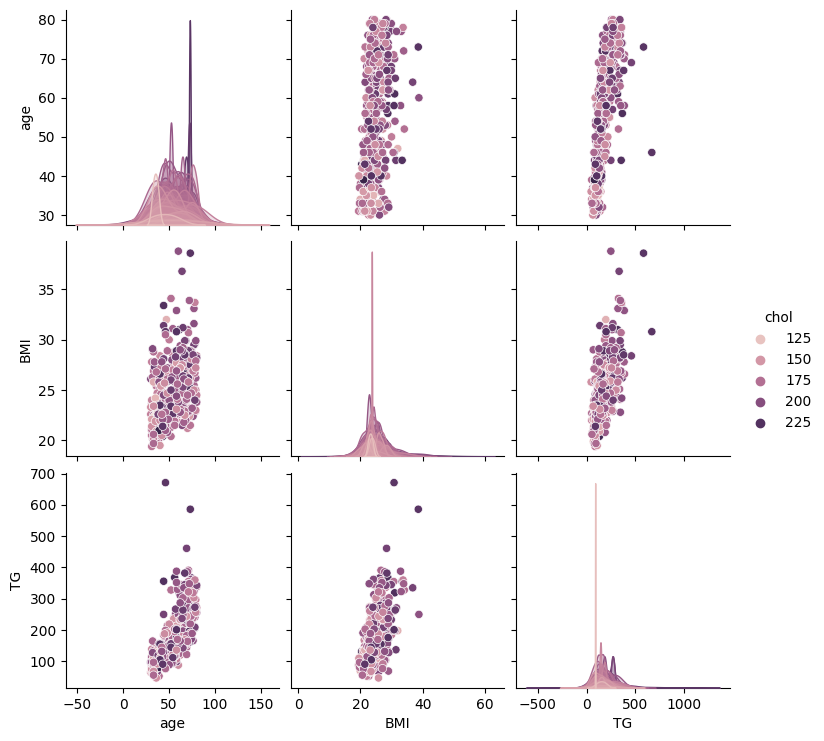

In [ ]:
# pairplot относительно chol
cols = 'age','BMI','TG'
_ = sns.pairplot(df, vars = cols, hue='chol')

In [ ]:
# change type to categorical columns:
for col in 'DM', 'APOE', 'rs174548', 'rs4775041', 'HTN', 'chd':
  df[col] = df[col].astype('category')

df.dtypes

DM           category
age             int64
chol            int64
BMI           float64
TG              int64
APOE         category
rs174548     category
rs4775041    category
HTN          category
chd          category
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 399
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   DM         363 non-null    category
 1   age        363 non-null    int64   
 2   chol       363 non-null    int64   
 3   BMI        363 non-null    float64 
 4   TG         363 non-null    int64   
 5   APOE       363 non-null    category
 6   rs174548   363 non-null    category
 7   rs4775041  363 non-null    category
 8   HTN        363 non-null    category
 9   chd        363 non-null    category
dtypes: category(6), float64(1), int64(3)
memory usage: 17.1 KB


[0.5] Is there anything strange about any of the features? If yes, what can be done?

* Как можно заметить из боксплотов и гистограмм BMI и TG, в данных выборках присутствуют явные выбросы по значениям, от которых стоит избавиться, так как настолько высоких значений мало. Из-за того, что датасет небольшой, стоит разумно подходить к данной части, поэтому я попробую подрезать 0,01 данных датасета.
  
  По гистограммам видно, что переменные с численными данными распеределены относительно хорошо (про выбросы указано выше) и имеют нормальное распределение, особенно общий уровень холестерина. Я получила также графики категориальных переменных: уровни DM (диабет есть или нет), можно сказать совершенно одинаковы. Что касается снипов, то как и ожидалось, количество вариантов с альтернативными аллелями значительно ниже. Также больше строк с отсутствием гипертонии и/или присутствием ишемическая болезнь сердца, чем наоборот. Переменная APOE принимает чаще всего значения (более 200 штук), соответствующие четвертому генотипу 4 = e3/e3. Но генотипы 2 = e2/e3 и 5 = e3/e4 также присутствуют в хорошем количестве (около 50 каждый).

  Более того, heatmap показывает, что некоторые признаки имеют хорошую корреляцию, такие как TG и age (0.8), BMI и TG (0.56), BMI и age(0.41). Интерпретируемость модели может сильно зависеть от корреляции признаков, поэтому для каждой модели выбирают сыои решения по работе с признаками, например, их могут как-то скорректировать или даже выкинуть. В данном случае, я не считаю, что зависимости не такие большие, чтобы как-то менять признаки (высокие примерно от 0.95 и выше). Поэтому разберусь только с лишними выбросами.

  Помимо всего прочего, боксплоты показывают медиану распределения, можно сказать, что среднее значение выборки с общим уровнем холестерина равно 180 мг/дл, что соответствует 4,655 ммоль/л (перевод для значений холестерина с помощью интернет-ресурса), что является правдой.

In [ ]:
# отсеиваем часть выбросов (outliers): "trim" the data and keep only records where values in each column are within [ 𝛼 , 1- 𝛼 ] percentiles
# пусть alpha = 0.01 - отрезаем по 1% с каждой стороны

numeric = list(df.select_dtypes(include=np.number).columns)

low, high = 0.01, 0.99
quantiles = df[numeric].quantile([low, high])

# Remove age column from the 'trimming' procedure
# quantiles.drop(columns=['Year'], inplace=True)

for col in quantiles.columns:
  low, high = quantiles[col].tolist()
  mask = (df[col] >= low) & (df[col] <= high)
  df_trim = df[mask]

print(f"Records before: {len(df)}")
print(f"Records after: {len(df_trim)}")

Records before: 363
Records after: 355


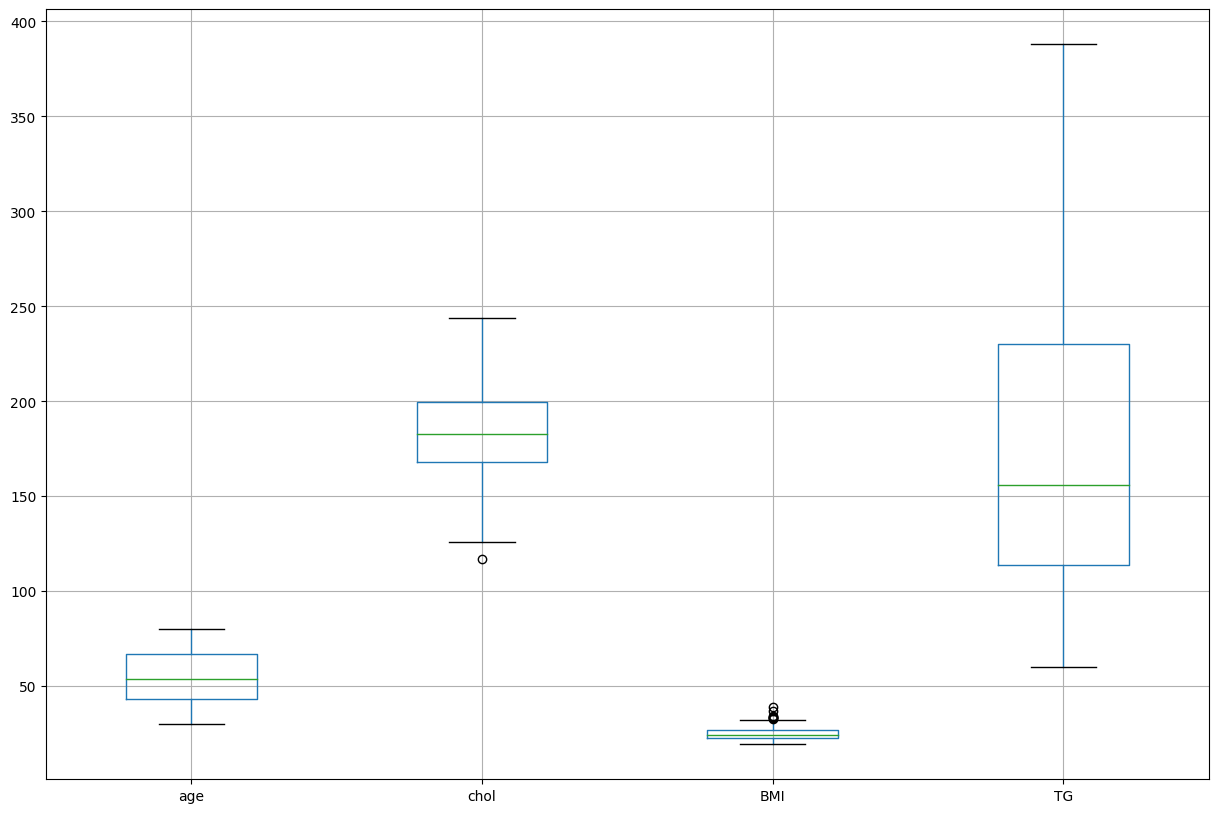

In [ ]:
_ = df_trim[numeric].boxplot(figsize=(15, 10))

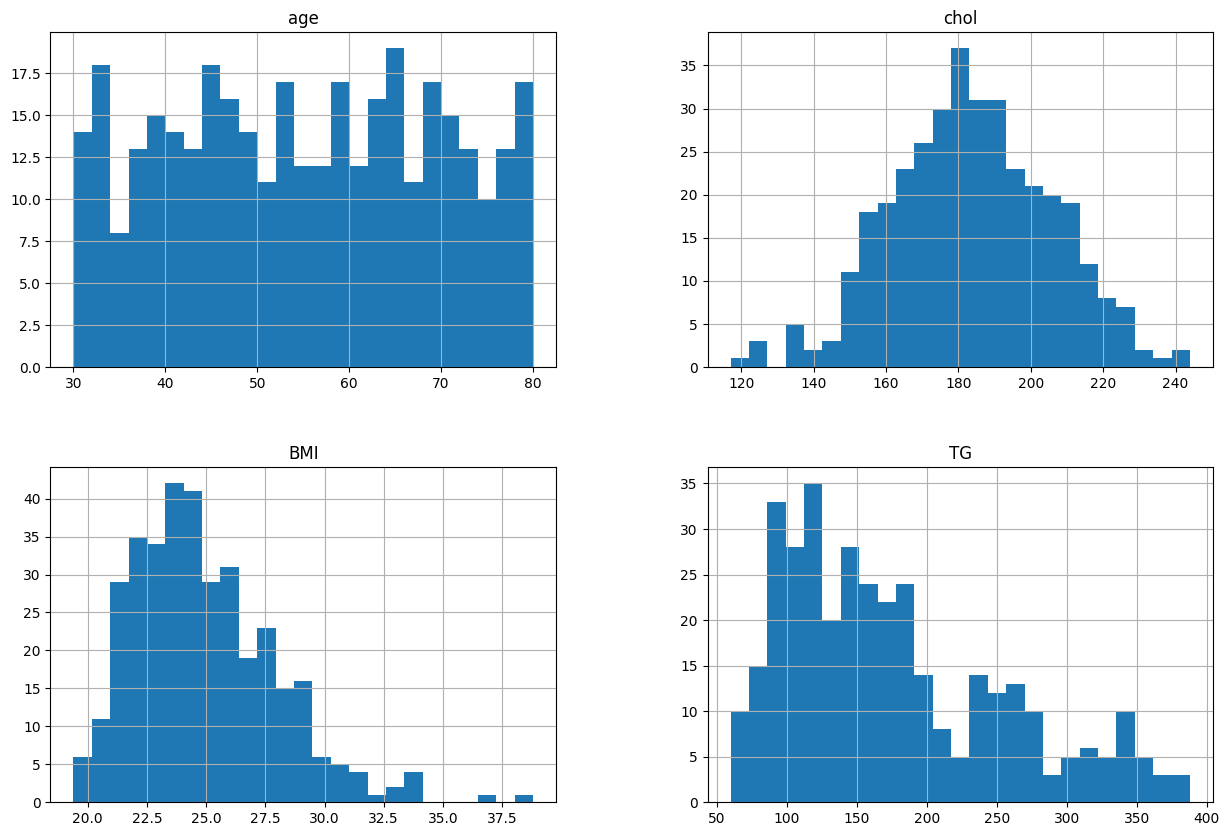

In [ ]:
_ = df_trim[numeric].hist(figsize=(15, 10), bins=25)

* Получилось избавиться от выбросов в TG, но они остались у переменной BMI. Если хочется отсечь выбросы сверху у BMI, то необходимо использовать alpha равный 10%-15% и более, но подрезать такое количество данных я не буду, так как датасет сам по себе небольшой и дальнейшее уменьшение количества данных может плохо повлиять.

  Поэтому я посмотрю, какие именно значения являются outliers в BMI и уберу конкретно их:

In [ ]:
df_trim['BMI'].sort_values().tail()

315    33.7
377    33.9
4      34.1
118    36.8
151    38.8
Name: BMI, dtype: float64

In [ ]:
# отрезаем выбросы

df_trim = df_trim[df_trim.BMI < 33]

len(df_trim)

348

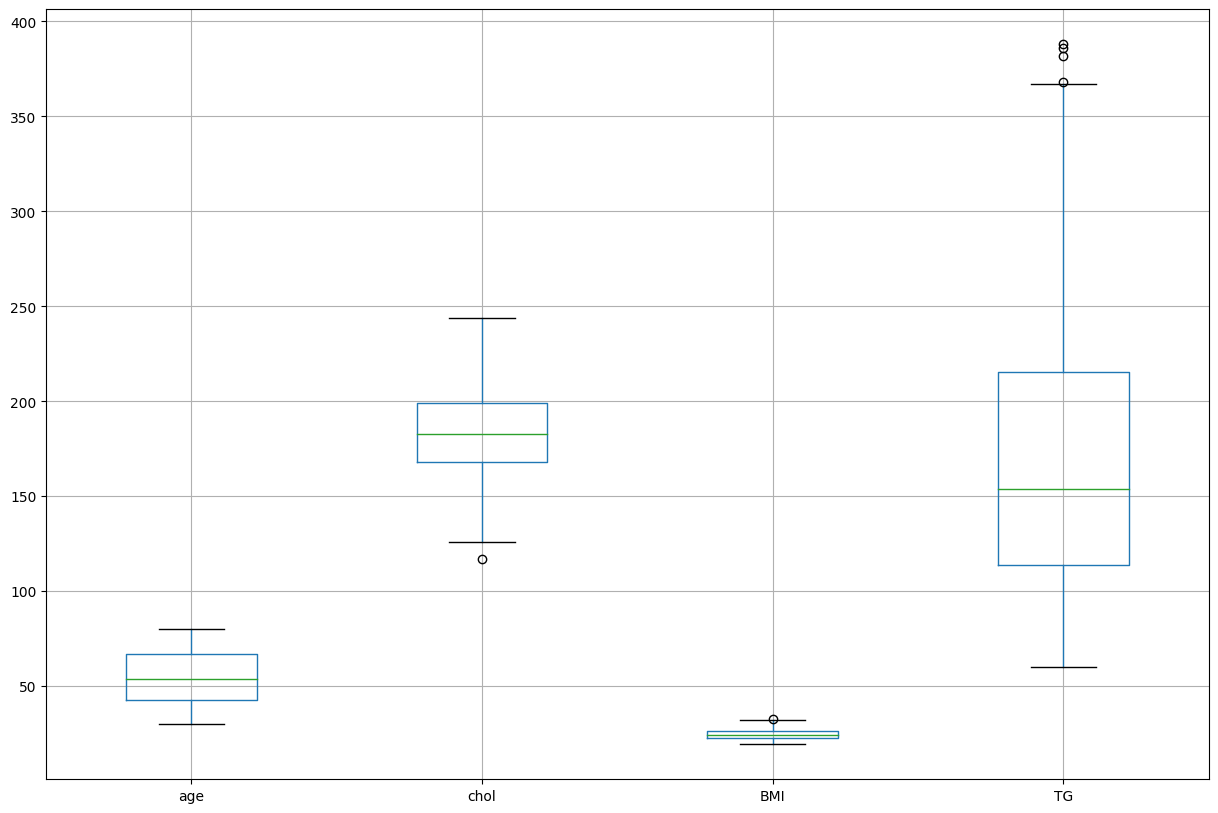

In [ ]:
_ = df_trim[numeric].boxplot(figsize=(15, 10))

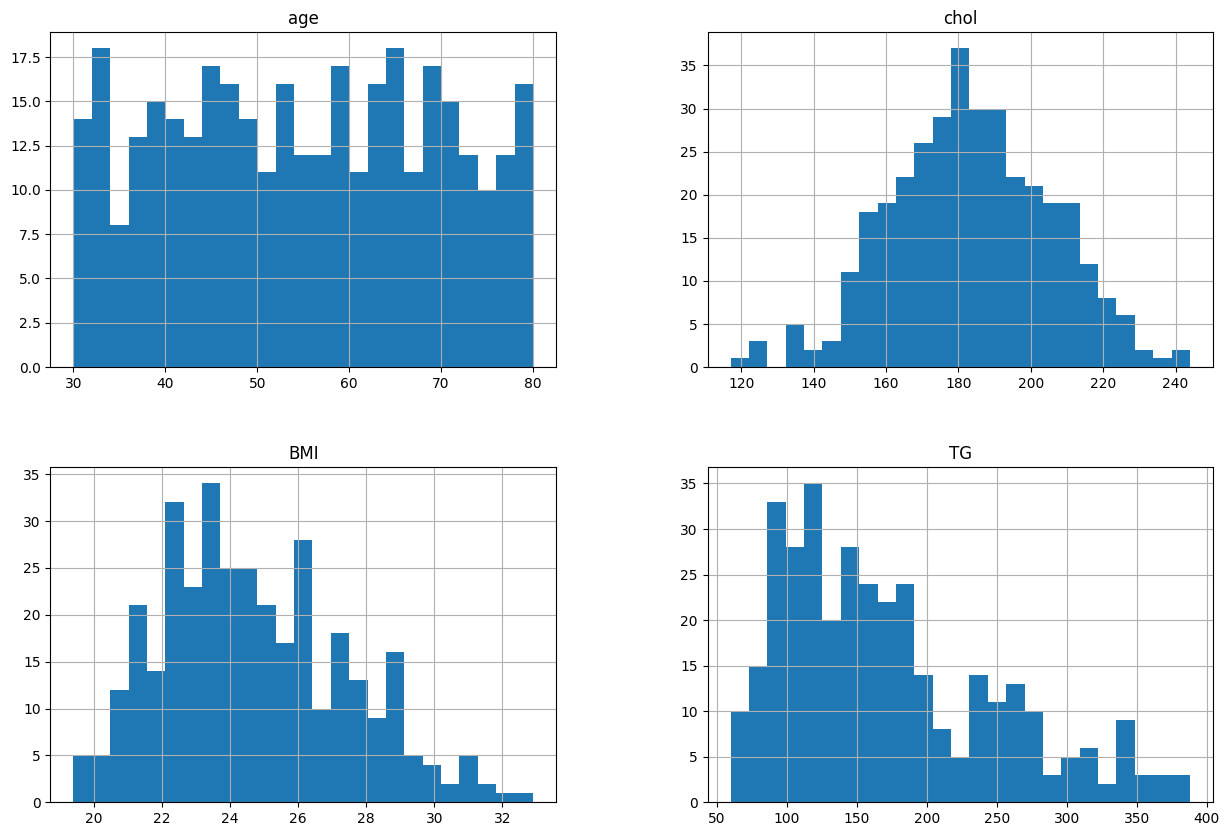

In [ ]:
_ = df_trim[numeric].hist(figsize=(15, 10), bins=25)

[0.75] Explore the relationship of features and interpret it if possible.

* Ранее уже получался график heatmap с взамосвязями между каждым признаком. Очень высокой корреляции нет (0.9 и выше), чтобы можно было делать вывод о мультиколлинеарности.

<ipython-input-107-51c752cf0a9e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_trim.corr(method='spearman')


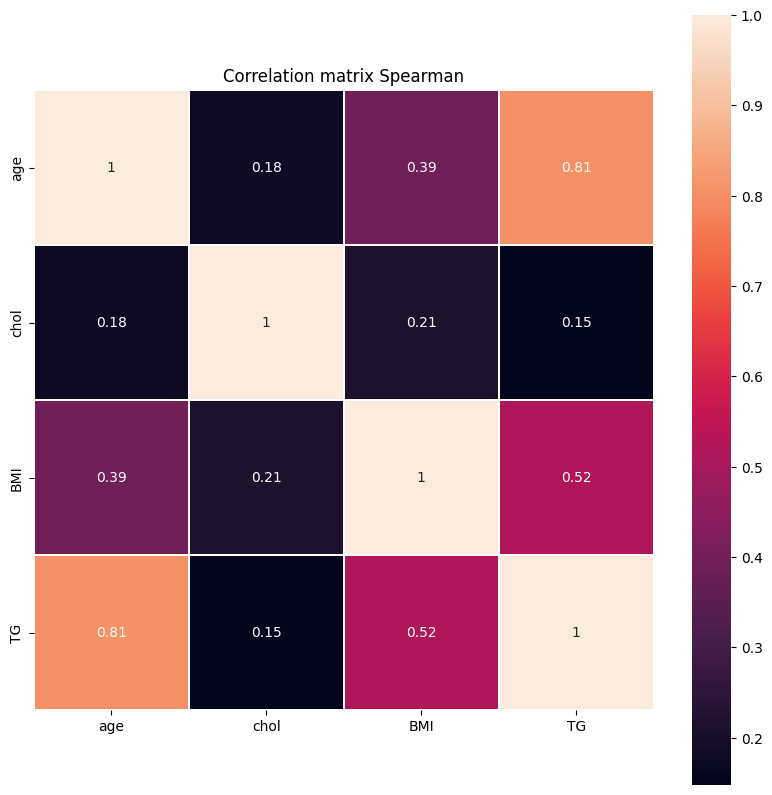

In [ ]:
correlations = df_trim.corr(method='spearman')

plt.figure(figsize=(10,10))
sns.heatmap(correlations, square=True, annot=True, linewidths=0.25)
plt.title("Correlation matrix Spearman")
plt.show()

In [ ]:
df_trim[numeric].describe()

,age,chol,BMI,TG
count,348.000000,348.000000,348.000000,348.000000
mean,54.399425,183.402299,24.710632,172.229885
std,14.327527,22.189755,2.697640,76.304781
min,30.000000,117.000000,19.400000,60.000000
25%,42.750000,168.000000,22.600000,113.750000
50%,54.000000,183.000000,24.350000,154.000000
75%,67.000000,199.250000,26.400000,215.250000
max,80.000000,244.000000,32.900000,388.000000


In [ ]:
categorical = df.select_dtypes('category').columns.tolist()
categorical

['DM', 'APOE', 'rs174548', 'rs4775041', 'HTN', 'chd']

In [ ]:
ddf = pd.get_dummies(df_trim, columns=categorical, drop_first = True)
ddf.head(n=10)

,age,chol,BMI,TG,DM_1,APOE_3,APOE_4,APOE_5,APOE_6,rs174548_1,rs174548_2,rs4775041_1,rs4775041_2,HTN_1,chd_1
0,74,215,26.2,367,1,0,1,0,0,1,0,0,1,1,1
1,51,204,24.7,150,1,0,1,0,0,0,1,1,0,1,1
2,64,205,24.2,213,0,0,1,0,0,0,0,1,0,1,0
3,34,182,23.8,111,0,0,0,0,0,1,0,1,0,1,0
6,79,159,22.9,274,0,0,0,0,0,0,1,1,0,1,0
7,38,169,24.9,137,0,0,0,0,0,1,0,1,0,0,0
8,52,175,20.4,125,0,0,1,0,0,0,0,1,0,0,0
9,58,189,22.0,209,0,0,0,1,0,0,0,1,0,1,0
10,43,207,21.0,122,0,0,0,1,0,1,0,0,0,1,0
11,64,166,26.1,163,1,0,1,0,0,0,0,0,0,1,0


[0.15] Answer the following questions:

* Why can't categorical attributes be encoded with natural numbers?

  Есои имеется в виду, почему нельзя закодировать категориальные данные по порядку натуральными числами (или большим количеством натуральных чисел), то этого нельзя сделать из-за того, что тогда какие-то значения будут иметь больший вес и интерпретируемость данных нарушится, кроме того, у категориальных переменных отсутствует порядок, а таким образом мы введем его.

* Would fields like 'id' cause the model (not necessarily linear) to overfit? Why?

  Переобучение обычно возникает из-за неправильно подобранных гиперпараметров, поэтому, я думаю, что переобучение вряд ли возникнет из-за поля 'id'. Но если оно появляется в датасете, что делают очень редко (не замечала, чтобы так делали), то это поле будет иметь уникальные для каждой строчки датасета значения, которые буду уникально присваиваться к каким-то признакам, что может и привести к переобучению.

### Machine Learning [5.5]

[0.35] Split the data into train/test subsets and choose your target performance measure. Explain your choice.

In [ ]:
from sklearn.model_selection import train_test_split

Y = ddf.pop("chol")
Y = Y.values
X = ddf.values

print("Before:")
print(f"\tX: {X.shape}; Y: {Y.shape}")


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state = 0
)

print("Train:")
print(f"\tX: {X_train.shape}; Y: {Y_train.shape}")
print("Test:")
print(f"\tX: {X_test.shape}; Y: {Y_test.shape}")

Before:
	X: (348, 14); Y: (348,)
Train:
	X: (243, 14); Y: (243,)
Test:
	X: (105, 14); Y: (105,)


[0.15] Answer the following questions:

* Why do we need to scale the feature matrix before training machine learning models?

  Масштабирование признаков необходимо, чтобы повысить эффективность алгоритма и ускорить обработку машинного обучения. Модель станет более понятной (интерпретируемой), так как масштаб признаков будет одинаковым.

* Why do you think we don't produce scaling of One Hot encoded features?

  Все значения (бинарные) и так являются либо 0, либо 1 (что соответствует обозначению какого-либо признака), так что смысла в масштабировании нет.

[0.35] Apply transformation to data, if needed. Justfy your choice.

Нам необходимо работать с нормализованными данными (то есть с приблизительно нормальными), поэтому буду использовать PowerTransformer. Метриками качества я выбираю R^2 и MSE (Средняя квадратическая ошибка). Второе - это оценка среднего значения квадрата ошибок, различие между предсказанием и фактическим значением. R^2 показывает, какая доля дисперсии целевой переменной, которую модель смогла объяснить, поэтому ключевой метрикой качества у меня будет R^2.

In [ ]:
from sklearn.preprocessing import PowerTransformer

ptransform = PowerTransformer().fit(X_train)
print("Estimated lambda: ", ptransform.lambdas_)

X_train = ptransform.transform(X_train)
X_test = ptransform.transform(X_test)

Estimated lambda:  [ 8.95552031e-01 -9.56652164e-01 -4.14301573e-02 -3.56224637e-02
 -8.76437252e+01  3.46304324e+00 -1.02508493e+01 -4.38218632e+01
 -2.26032873e+00 -1.94760218e+01 -9.69005107e-01 -1.84506513e+01
  7.77012615e+00 -3.27954865e+00]


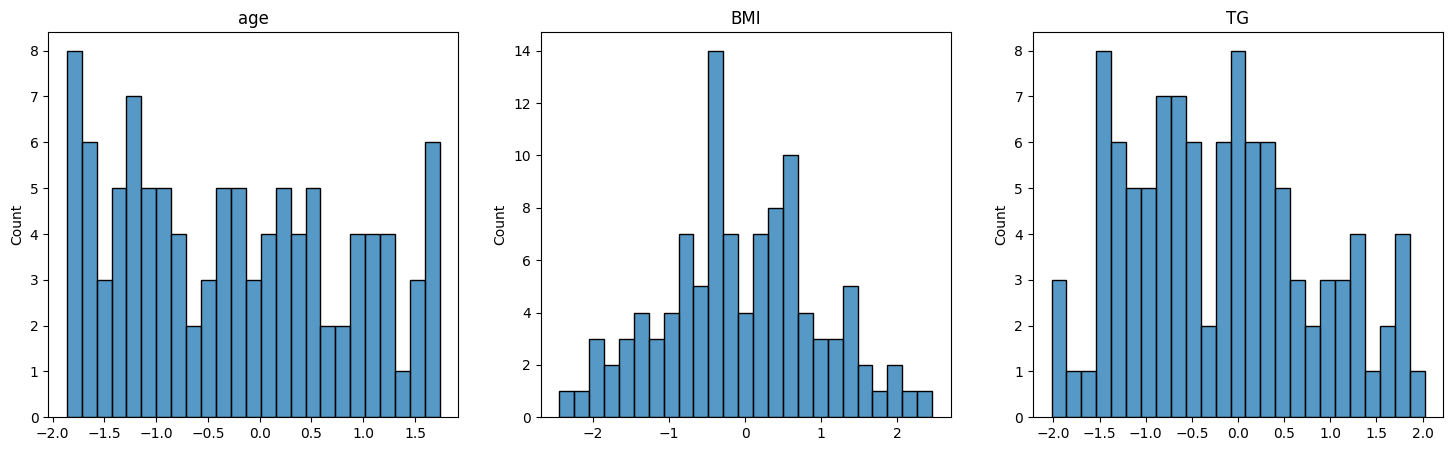

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
axes = axes.ravel()

X, Y = X_test, X_train
for ax, col in zip(axes, range(X.shape[1])):
  sns.histplot(x=X[:, col], ax=ax, bins=25)
  ax.set_title(ddf.columns[col])

[0.25] Train a simple linear regression model, and rank it using test set. How well the model is doing?

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)
print('Score = ',lr.score(X_train, Y_train))

Score =  0.367829468468168


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

for name, X, Y in ("train", X_train, Y_train), ("test", X_test, Y_test):

  Ypred = lr.predict(X)
  R2 = r2_score(Y, Ypred)
  MSE = mean_squared_error(Y, Ypred)

  print(f"{name}: R^2 = {R2:.4f}, MSE = {MSE:.4f}")

train: R^2 = 0.3678, MSE = 293.1215
test: R^2 = 0.3029, MSE = 383.2911


R^2 на тестовой выборке стал хуже, чем было на трэйне, можно сказать, что это не очень хорошие результаты, но в целом сами значения R^2 очень маленькие, то есть модель слабая. MSE же наооброт больше на тестовых данных

[0.1] Answer the following question:

* From a simple linear regression model point of view, are the largest weights always the most important ones?

  Насколько знаю, не всегда. Для этого должны соблюдаться такие моменты, как одинаковый масштаб признаков и очень скоррелированные друг с другом признаков.

[0.25] Obtain weights of the linear regression equation for this model and interpret them.

In [ ]:
for i in range(len(ddf.columns)):
  print(f"{ddf.columns[i]}: {lr.coef_[i]}\n")

age: 2.527857288853431

BMI: -0.0750132563013528

TG: 0.21348830824065268

DM_1: 3.7980075603846486

APOE_3: 2.4518055408959496

APOE_4: 4.2035710275316

APOE_5: 7.124291307745493

APOE_6: 4.0314911419351915

rs174548_1: 3.461472679266429

rs174548_2: 2.11237526810861

rs4775041_1: 0.2242118216546795

rs4775041_2: -1.1003411306254067

HTN_1: -0.18162235704808183

chd_1: 8.20373421836128



In [ ]:
print(lr.intercept_)

183.6296296296293


Наиболльший
е коэффициент получился у APOE с 4 и 5 генотипами и заболевание ишемической болезни сердца. Кроме того, хорошие веса у снипа rs174548 с первым набором аллелей и возраста.

Почему-то rs4775041_2, TG, BMI (индекса массы тела человека) обладают слишком маленьким весом, не до конца понятно, что именно повлияло на такое распределение весов.

[0.25] What are residuals? Make a residuals vs predictions plot below. What do you observe?

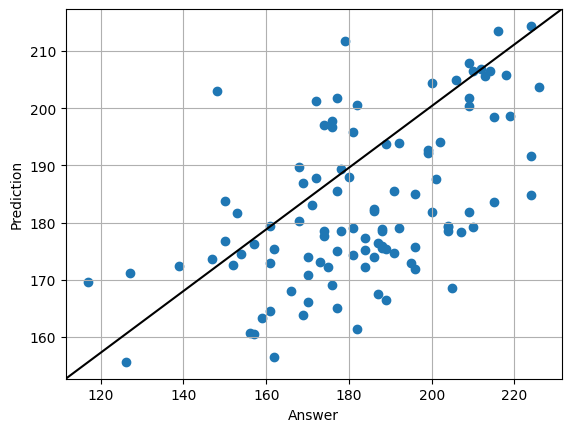

In [ ]:
plt.scatter(Y_test, lr.predict(X_test))
plt.grid()
plt.xlabel('Answer')
plt.ylabel('Prediction')
# Make a diagonal line, set equal limits to the size of x and y axes
ax=plt.gca()

plt.plot([0,1],[0,1], color='black', transform=ax.transAxes)

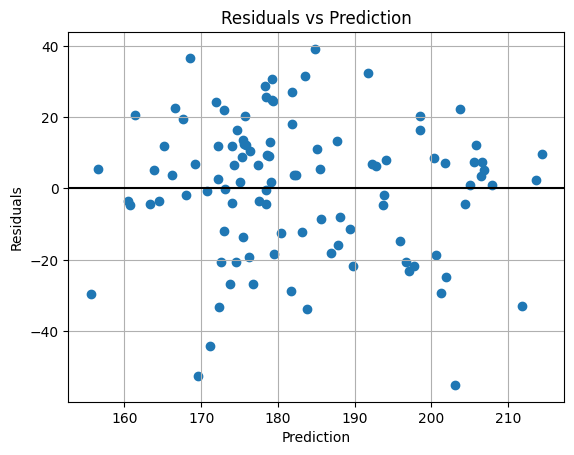

In [ ]:
plt.scatter(lr.predict(X_test), Y_test - lr.predict(X_test))
plt.grid()
# Make a diagonal line, set equal limits to the size of x and y axes
ax=plt.gca()
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.title('Residuals vs Prediction')
plt.axhline(y=0, color='black')

Выглядит всё не очень хорошо, так как точки сильно разбросаны, максимальные и минимальные значения доходят до 40 и -45, соответственно. Но при этом, можно сказать, они достаточно равномерны, основная часть данных находится от -25 до 25.

[0.25] Now train the Lasso regression model. On a logarithmic scale, search for the optimal value of the regularization coefficient alpha.

In [ ]:
# Lasso - l1 norm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

grid = {'alpha': 10.**(np.arange(-10, 10))}
grid_search = GridSearchCV(Lasso(), grid, cv=5)
grid_search.fit(X_train, Y_train)

print("Best alpha", grid_search.best_params_)

Best alpha {'alpha': 0.1}


Таким образом, оптимальный коэффициент это 0.1

In [ ]:
# альфа будет 0.1:
reg = Lasso(alpha = 0.1).fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Lasso R^2: ', r2_score(Y_test, Y_pred))
print("MSE:", mean_squared_error(Y_test, Y_pred))

Lasso R^2:  0.30125394194004396
MSE: 384.2047436397579


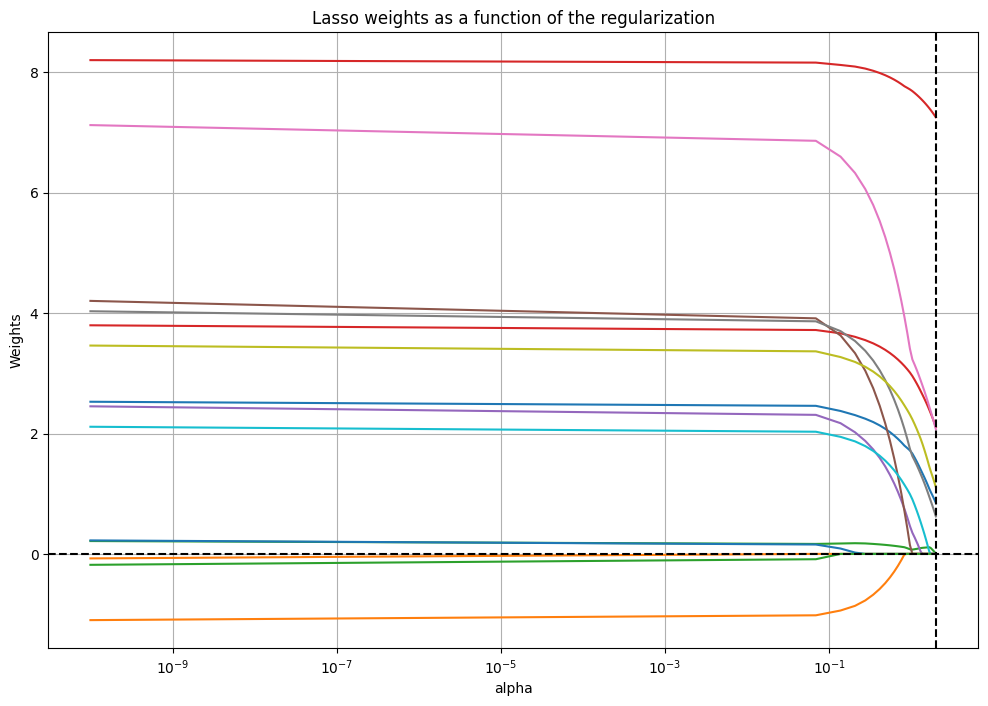

In [ ]:
alphas = np.linspace(1e-10, 2, 30)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train, Y_train)
    coefs.append(model.coef_)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(alphas, coefs)
ax.set(xscale='log', xlabel='alpha', ylabel='Weights',
       title='Lasso weights as a function of the regularization')
ax.axvline(2, color='black', ls='--')
ax.axhline(0, color='black', ls='--')
ax.grid()

[0.25] For each sampled alpha for Lasso, count the number of zero weights in the model and plot its dependence on alpha. How much will we have to lose in prediction quality if we want to get rid of at least half of the features using Lasso?

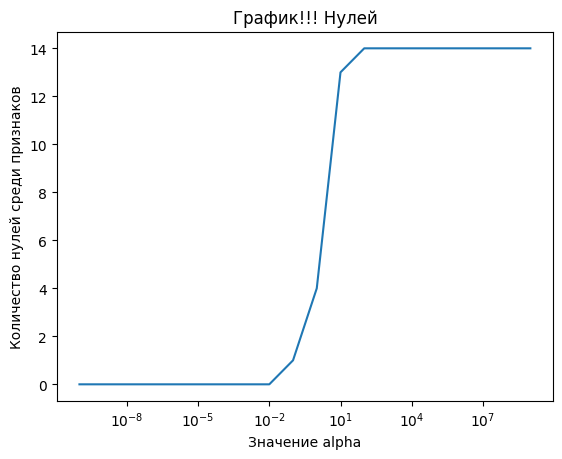

In [ ]:
alphas = 10.**(np.arange(-10, 10))
zeros = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, Y_train)
    zeros.append(len([x for x in model.coef_ if x == 0]))

plt.plot(alphas, zeros)
plt.xscale('log')
plt.xlabel('Значение alpha')
plt.ylabel('Количество нулей среди признаков')
plt.title('График!!! Нулей')
plt.show()

In [ ]:
# альфа будет примерно 1, если потеряются уже половина фичей:
reg = Lasso(alpha = 1).fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Lasso R^2: ', r2_score(Y_test, Y_pred))
print("MSE:", mean_squared_error(Y_test, Y_pred))

Lasso R^2:  0.24753378948801708
MSE: 413.74270977644653


При альфа равном 0.1 , когда еще все веса ненулевые, R^2: 0.30125394194004396 и MSE: 384.2047436397579. Можно заметить, что качество прогнозирования падает, но если рассматривать в общем, то не так сильно, так как модель обучена плохо. Можно предположить, что какие-либо скоррелированые признаки негативно влияют на обучение модели в целом, и какие-то из них необходимо убрать.

[0.5] Train and optimize hyperparameters for Elastic Net, Ridge, SVM and KNN.

In [ ]:
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier

# Elastic Net - l1 and l2 norm
grid = {'alpha': 10.**(np.arange(-10, 10))}
grid_search = GridSearchCV(ElasticNet(), grid, cv=5)
grid_search.fit(X_train, Y_train)

print("Best alpha for ElasticNet", grid_search.best_params_)


# Ridge - l2 norm
grid = {'alpha': 10.**(np.arange(-10, 10))}
grid_search = GridSearchCV(Ridge(), grid, cv=5)
grid_search.fit(X_train, Y_train)

print("Best alpha for Ridge", grid_search.best_params_)

Best alpha for ElasticNet {'alpha': 0.1}
Best alpha for Ridge {'alpha': 10.0}


In [ ]:
grid = {
    'n_neighbors': list(range(2, 10)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

grid_search = GridSearchCV(KNeighborsClassifier(), grid, cv=5)
grid_search.fit(X_train, Y_train)

print("Best KNN", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best KNN {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}


In [ ]:
from sklearn.svm import SVR

grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf']
}

grid_search = GridSearchCV(SVR(), grid, cv=5, verbose = 2)
grid_search.fit(X_train, Y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1,

[0.25] Justify the parameters grid for each model. What number of cross-validation folds did you use? Why?

Насколько знаю, наиболее часто выбирают для количетсва фолдов значени 5 или 10 (из интернет-ресурса). И чем больше количество фолдов, тем точнее модель, но я использовала 5, потому что на моих данных с 10 обучением происходило еще более странно, чем есть на данный момент.

[0.85] Use test set to rank optimized models. Describe and interpret results.

In [ ]:
models = {
    "OLS": LinearRegression().fit(X_train, Y_train),
    "Lasso": Lasso(alpha=0.1).fit(X_train, Y_train),
    "Ridge": Ridge(alpha=10).fit(X_train, Y_train),
    "Elastic Net": ElasticNet(alpha=0.1).fit(X_train, Y_train),
    "KNN": KNeighborsClassifier(metric = 'euclidean', n_neighbors = 2, weights = 'uniform').fit(X_train, Y_train),
    "SVM": SVR(C = 1, kernel = 'linear').fit(X_train, Y_train)
}

# Train and print metrics
for name, X, Y in ("train", X_train, Y_train), ("test", X_test, Y_test):
  print(name)
  for mtype, model in models.items():
    R2 = r2_score(Y, model.predict(X))
    MSE = mean_squared_error(Y, model.predict(X))
    print(f"\t{mtype}: R^2 = {R2:.4f}, MSE = {MSE:.4f}")

train
	OLS: R^2 = 0.3678, MSE = 293.1215
	Lasso: R^2 = 0.3674, MSE = 293.3352
	Ridge: R^2 = 0.3667, MSE = 293.6637
	Elastic Net: R^2 = 0.3654, MSE = 294.2323
	KNN: R^2 = 0.3011, MSE = 324.0823
	SVR: R^2 = 0.3350, MSE = 308.3472
test
	OLS: R^2 = 0.3029, MSE = 383.2911
	Lasso: R^2 = 0.3013, MSE = 384.2047
	Ridge: R^2 = 0.2978, MSE = 386.1088
	Elastic Net: R^2 = 0.2950, MSE = 387.6210
	KNN: R^2 = -0.5170, MSE = 834.1333
	SVR: R^2 = 0.3143, MSE = 377.0134


Можно сказать, что лучше всего сработала модель Lasso и Ridge, почти так же, как и OLS. Но разница в значениях незначительная. Здесь так же причиной могли стать выбросы, которые могли плохо повлиять на некоторые модели (например, на SVM) в маленьком наборе данных. Хуже всех справилась KNN, которая показывает плохие значения на тестовой выборке.

[0.85] Perform a feature importance analysis for all models (where applicable), interpret the results, and make appropriate comparisons.

In [ ]:
models = {
    "OLS": LinearRegression().fit(X_train, Y_train),
    "Lasso": Lasso(alpha=0.1).fit(X_train, Y_train),
    "Ridge": Ridge(alpha=10).fit(X_train, Y_train),
    "Elastic Net": ElasticNet(alpha=0.1).fit(X_train, Y_train),
    "SVM": SVR(C = 1, kernel = 'linear').fit(X_train, Y_train)
}
for name, model in models.items():
  print(f'{name} : {model.coef_}')

OLS : [ 2.52785729 -0.07501326  0.21348831  3.79800756  2.45180554  4.20357103
  7.12429131  4.03149114  3.46147268  2.11237527  0.22421182 -1.10034113
 -0.18162236  8.20373422]
Lasso : [ 2.42056736  0.          0.16917845  3.69492982  2.24787782  3.78556765
  6.74490643  3.79073813  3.3218929   1.99104207  0.12571711 -0.98430214
 -0.04552839  8.14436498]
Ridge : [ 2.27594832  0.01208089  0.42864293  3.73764525  2.17633101  3.4829682
  6.39962756  3.61410584  3.3117638   1.98418062  0.21177852 -0.98447107
 -0.13318432  7.90781027]
Elastic Net : [ 2.17886399  0.02229029  0.4647278   3.68535736  2.03863276  3.17851366
  6.10531227  3.43661562  3.21597514  1.89969256  0.16625711 -0.90742976
 -0.05649778  7.8180311 ]
SVM : [[ 2.62260067e+00 -1.15630690e-01  1.06108552e+00  3.78149843e+00
  -2.10942375e-15  5.55947123e+00  7.70419456e+00  3.62434555e+00
   4.33351837e+00  1.33276417e+00  1.47256032e+00  5.96418965e-02
  -1.44928630e+00  7.62702698e+00]]


In [ ]:
ddf.columns

Index(['age', 'BMI', 'TG', 'DM_1', 'APOE_3', 'APOE_4', 'APOE_5', 'APOE_6',
       'rs174548_1', 'rs174548_2', 'rs4775041_1', 'rs4775041_2', 'HTN_1',
       'chd_1'],
      dtype='object')

У KNN нет атрибута коэффициенты, поэтому его не выводила.
В целом, веса всех моделей примерно одинаковы. Как и раньше, наибольшие значения получили люди с ишемической болезнью сердца и пятым генотипом APOE. Шестой генотип APOE, развитие диабета и вариант rs174548_1 также имеют хорошие значения. Таким образом, можно сказать, что данные признаки наилучше всего скоррелированы с таргетной переменной, причем прямой связью. Со многими данными признаками понятно, почему они связаны с общим уровнем холестерина (то есть, при повышении уровня повышается и риск заболевания диабетом, например), что касается пятого и шестого генотипов АРОЕ, то это 5 = e3/e4, 6 = e4/e4. Существуют разные исследования, в которых указывается связь данных e3/e4 и 6 = e4/e4 с уровнем холестерина и заболеваниями, связанными с ним (вообще, уже известна их связь и с болезнями сердца, также и ишемической болезни сердца).

Отрывок из исследования:
* The APOE ε4 allele and the genotypes (ε3/ε4 and ε4/ε4) were associated with an increased risk of hypertension in different population studies, for example, in Asians and Caucasians [6]. Likewise, the individuals who carried the genotypes APOE ε3/ε4 and ε4/ε4, had high levels of LDL-C and increased blood pressure
  (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8619821/)

  SNP же, как было указано в начале домашней работы, так же имеет связь с измерением (измерение общего уровня холестерина, измерение уровня холестерина липопротеидов высокой плотности, исследования которых проводились в 2019 и 2010 годах, и т.д., кроме того, существуют информация о связи с измерением уровня триглицеридов и содержания фосфатидилэтаноламина). Странно, но BMI у Lasso совсем занулился. Непонятно, почему почти отсутсвует корреляция с индексом массы тела и  TG-уровнем, возможно на фоне остальных признаков данные не имеют настолько сильной выраженной связи, но не стоит забывать, что показатели прогнозирования могли быть лучше.

[0.85] Answer the following questions:

* Which model works the best with cholesterol data? Explain, what could be the reason for it.

Можно сказать, что лучше всего сработала модели Lasso и Ridge, почти так же, как и OLS. Но разница в значениях незначительная. Здесь так же причиной могли стать выбросы, которые могли плохо повлиять на некоторые модели (например, на SVM) в маленьком наборе данных. Сложно понять конкретные причины такого обучения моделей.

* Based on your analysis above, have you found expected/unexpected important features? Is the connection with cholesterol level seems logical?

Да, наибольшие значения получили люди с ишемической болезнью сердца и пятым генотипом APOE, далее хорошие значения имеют генотип 6 = e4/e4 APOE, развитие диабета и вариант rs174548_1. Все они логично связаны с общим уровнем холестерина.

* Would you suggest to use that model to a doctor or use it in a real study?

Я думаю, что не стоит предлагать данную модель для врачей, так как метрики далеко не самые лучшие по причине маленького датасета (что тоже является причиной не давать модель врачам) и возможно присутствующих корреляций признаков и выбросов значений.

# Extra points [2.0]

[0.5 + 1.0] Implement stochastic gradient descent for linear regression from scrath. Make it in a form of python function!

[0.5] If you make it as simple as the one-feature model we looked at in the class, [1.0] for implementation that works with whole cholesterol dataset.

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ

[0.5] Use any implementation of SGD to calculate MSE at each step. Make a plot that represents how MSE changes with each step. What learning rate and batch size works best for you?

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ